<a href="https://colab.research.google.com/github/ellaroberson/Statistics-and-Probability/blob/main/Ella_Final_Project_Notebook_Hahn_Stats_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Notebook - Spring 2024

Below we are importing the necessary python packages to complete the codes

In [ ]:
import matplotlib.pyplot as plt #allows you to create plots using matplotlib
import imageio #provides functions for reading and writing image data in various formats.
import torch #imports the PyTorch library provides functions for reading and writing image data in various formats.
import torchvision #imports the torchvision package, which provides utilities and pre-trained models
from torchvision import models, transforms # imports the torchvision package, which provides utilities and pre-trained models for computer vision task
import numpy as np #  imports the NumPy library and aliases it as np, providing support for numerical computations and array manipulation.
from torchvision.models import * # imports all models from the torchvision.models
from PIL import Image #used for opening, manipulating, and saving image files.
import requests #used to make HTTP requests. It is commonly used for downloading data from the web.
from torchvision import models
from torchsummary import summary #provides a summary of the neural network model, including the number of parameters and output shape

Documentation Block:
this code block is designed to display a grayscale image x in a plot with no axis labels or ticks, and with a specific size of 20x20 inches.

In [ ]:
def plot(x): #creates a display of plots from matplotlib
    fig, ax = plt.subplots() #creates a new figure and axes objects using plt.subplots()
    #'fig' variable represents the entire figure, while the 'ax' variable represents the axes on which the image will be plotted.
    im = ax.imshow(x,cmap='gray') #line plots the image x on the axes ax using the imshow() function
    #cmap='gray' argument specifies that the colormap to be used is grayscale
    ax.axis('off') #line turns off the axis labels and ticks for the plot.
    fig.set_size_inches(20, 20) # line sets the size of the figure in inches.
    #specifies the width and height of the figure to be 20 inches each
    plt.show() #line displays the plot

Documentation Block:
This code block retrieves the image data from the specified URL and stores it in the variable im,

In [ ]:
im = imageio.imread('https://raw.githubusercontent.com/imageio/imageio-binaries/master/images/imageio_banner.png')
#assigns the result of reading the image to the variable im

<ipython-input-3-2086ec9e0cf6>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('https://raw.githubusercontent.com/imageio/imageio-binaries/master/images/imageio_banner.png')


Documentation Block:
This block plots the im which was attached to a specified url in the previous code block

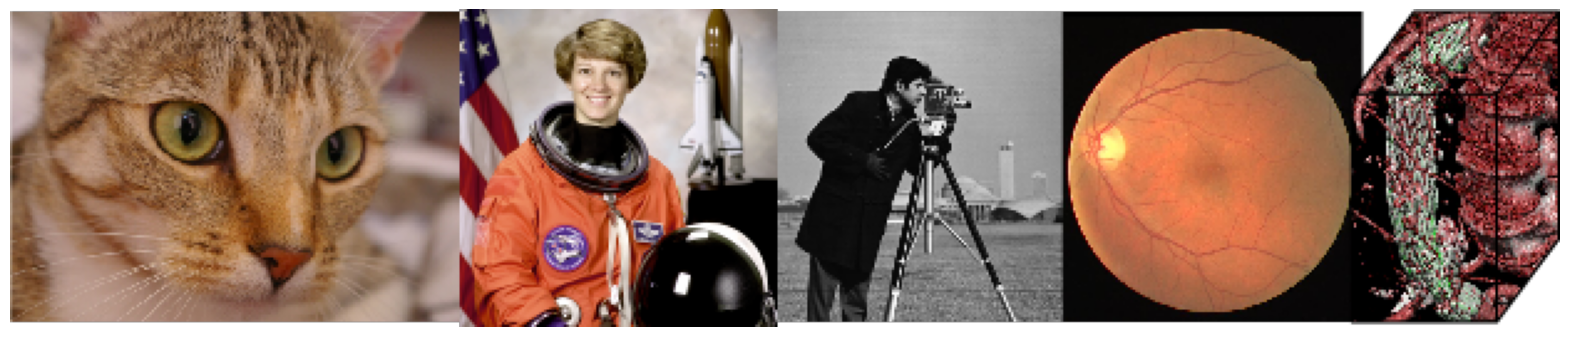

In [ ]:
plot(im) #plots the image given by the url named im

Documentation Block:
Creates an instance of the AlexNet model pretrained on ImageNet and moves it to the specified GPU device for computation

In [ ]:
net = alexnet(pretrained=True).cuda(0)
#reates an instance of the AlexNet neural network model pretrained on the ImageNet dataset and assigns it to the variable net
#When pretrained=True is specified, it indicates that the model should be loaded with weights pretrained on the ImageNet dataset.
#.cuda(0): This part of the code moves the model to the GPU for computation. .cuda()
#with index 0.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:05<00:00, 44.1MB/s]


Documentation Block:
the preprocessing code defined by the preprocess variable crops, converts, resizes, and normalizes input images to prepare them for consumption by a neural network model.

In [ ]:
normalize = transforms.Normalize( #line creates a normalization transformation.
   mean=[0.485, 0.456, 0.406], #states the mean of the pixel values
   std=[0.229, 0.224, 0.225] #states the standard deviation of the pixel across three RGB channels
)
preprocess = transforms.Compose([ #Compose class allows you to chain multiple transformations together into a single pipeline.
   transforms.Resize(256), #resizes the input image to have a height and width of 256 pixels
   transforms.CenterCrop(224), #crops the center of the resized image to have a size of 224x224 pixels
   transforms.ToTensor(), #converts the image data into a PyTorch tensor.
   normalize #includes the normalization transformation previously defined
])

Documentation Block:
gives new image to code for 'im'
and follows the same process as used above to plot it

In [ ]:
im = imageio.imread('https://www.medicalnewstoday.com/content/images/articles/322/322868/golden-retriever-puppy.jpg')

<ipython-input-7-772805ffc2cf>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('https://www.medicalnewstoday.com/content/images/articles/322/322868/golden-retriever-puppy.jpg')


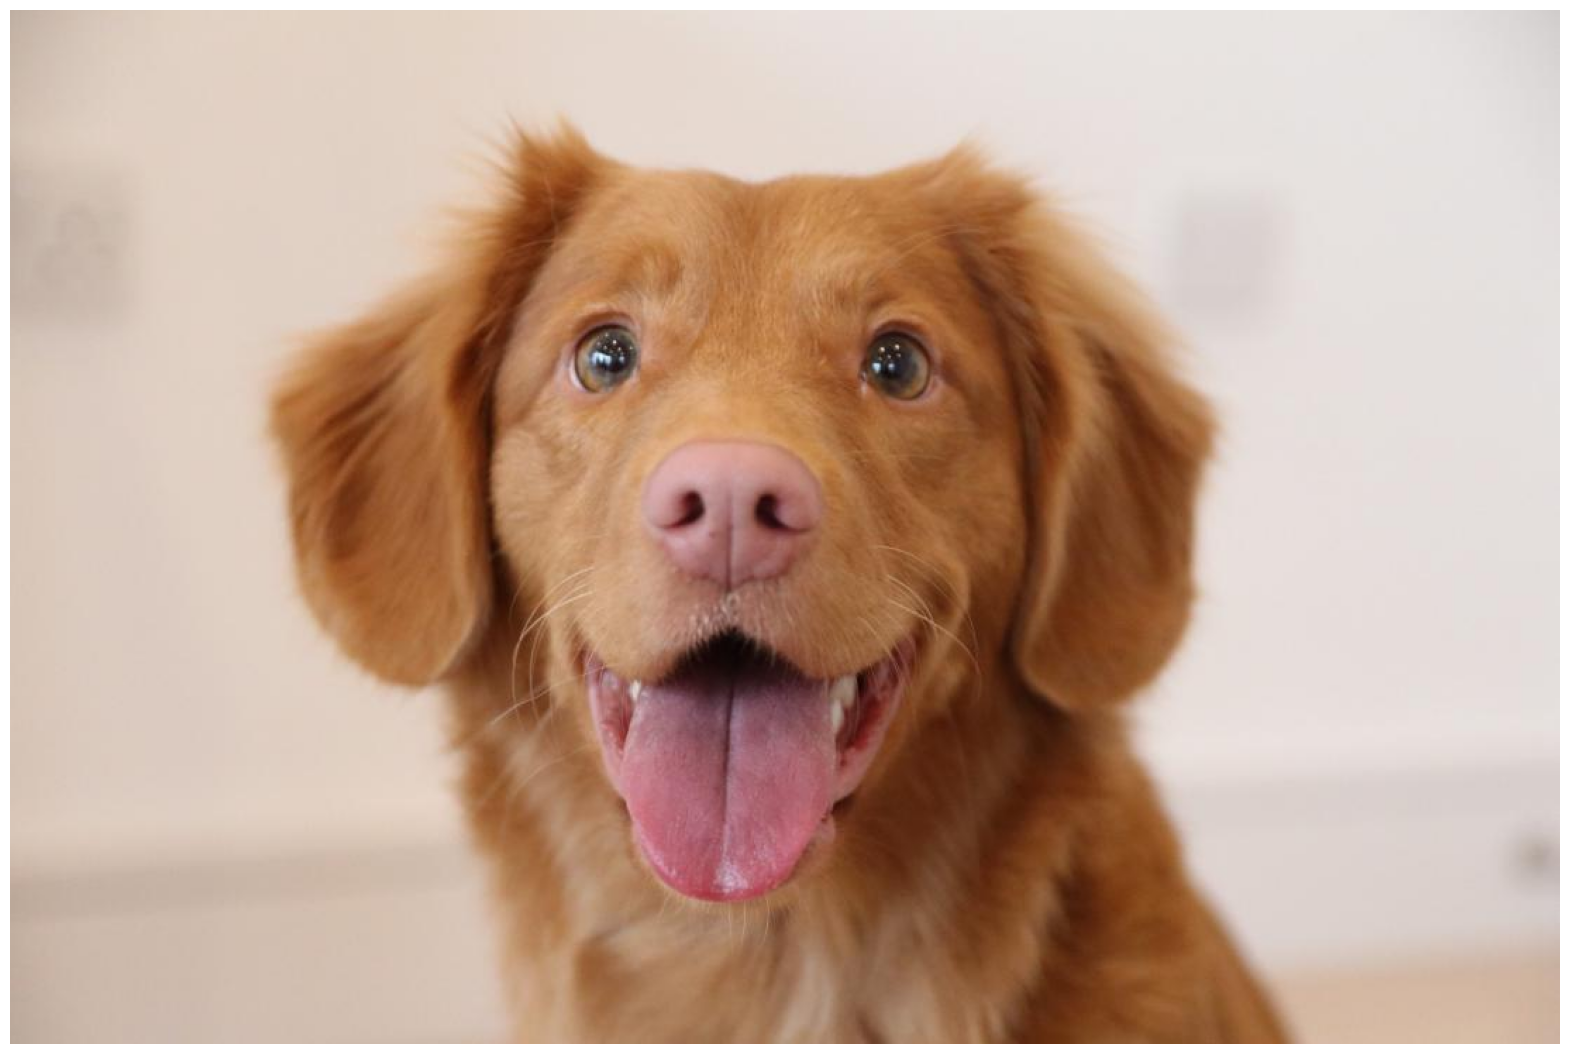

In [ ]:
plot(im)

Documentation block:
By using Image.fromarray(im), the NumPy array im is converted into a PIL image object named image. This conversion allows you to perform various image processing and manipulation tasks using the functionality provided by the PIL library.

In [ ]:
image = Image.fromarray(im) #convert to pil
#Image: This is a class from the PIL library used to represent and manipulate images.
#static method of the Image class that creates a new image object from a NumPy array

Documentation block:
uses preprocess like in previous code blocks where the input image uses the defined transformations and converts it into a PyTorch tensor for further processing

In [ ]:
img_tensor = preprocess(image) #The image is resized, center cropped, converted to a PyTorch tensor, and normalized according to the transformations specified in the preprocess

In [ ]:
img_tensor = img_tensor.unsqueeze_(0) #assigns the result of the unsqueeze_(0) operation back to the variable img_tensor.
#img_tensor will have an additional dimension at index 0, making it a 4D tensor with dimensions [batch_size, channels, height, width].

Documentation Block:
Given the image shape since was given new dimnesions in the previous code block

In [ ]:
img_tensor.shape #gives the dimensions of the image

torch.Size([1, 3, 224, 224])

In [ ]:
img_variable = torch.tensor(img_tensor).cuda(0)
#creates a copy of img_tensor with the same data and dtype.
#.cuda(0): This moves the tensor onto the GPU device with index 0

<ipython-input-13-a3c4eb55103d>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


Documentation Block:
'out' will contain the output predictions generated by the neural network model for the input image img_variable.

In [ ]:
out = net(img_variable) #passes the input image tensor img_variable
#result is stored in the variable out

Documentation Block:
 extracts the predicted label index from the output of the neural network model.

In [ ]:
label_index = out.cpu().data.numpy().argmax()
#out: This variable contains the output predictions
#.cpu(): This method moves the tensor out from the GPU device to the CPU.
#.data: This attribute accesses the underlying data of the tensor out.
#.numpy(): This method converts the Tensor object to a NumPy array.
#.argmax(): This method returns the index of the maximum value in the array.

In [ ]:
label_index #returns the value associated with the previous code

220

Documentation Block:
extracts the indices corresponding to the top-10 highest probability predictions from the output predictions

In [ ]:
top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:])
#np.flip(): This function reverses the order of elements along the specified axis
#np.argsort(): This function returns the indices that would sort the array in ascending order.
#[0]: This index selects the first dimension of the array
#[-10:]: This index selects the last 10 elements

In [ ]:
LABELS_URL = 'https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json'

documentation block:
creates a dictionary for convenient access to class labels by their corresponding indices from the class labels in the JSON file.

In [ ]:
labels = {int(key):value for (key, value) in requests.get(LABELS_URL).json().items()}
#fetches a JSON file from a URL using the requests.get()

In [ ]:
print(labels[label_index])
#prints the output of labels given from the url

Sussex spaniel


In [ ]:
for i in range(10):
    print(labels[top_list[i]])
    #goes over the  range of integers from 0 to 9
    #prints them in list form

Sussex spaniel
golden retriever
Brittany spaniel
cocker spaniel, English cocker spaniel, cocker
Blenheim spaniel
Irish setter, red setter
tennis ball
clumber, clumber spaniel
vizsla, Hungarian pointer
chow, chow chow


Documentaton block:
Output provides a high-level overview of the model's architecture, showing the layers and operations involved in the neural network. It helps you understand the structure and characteristics of the model you're working with.

In [ ]:
net

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Documenation block:
Summary includes information such as the number of parameters in each layer, the output shape of each layer, and possibly other relevant details about the model's architecture. This can be helpful for understanding the structure of the model and diagnosing issues related to its design or implementation.

In [ ]:
summary(net, (3, 224, 224))
#summery is used to get a summary of the architecture of a neural network model, including the number of parameters and the output shape of each layer
#(3, 224, 224) indicates that the input data is expected to have three channels (e.g., for an RGB image) and dimensions of 224x224 pixels.

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [ ]:
out = net.features[0](img_variable).cpu().detach().numpy()
#computes the output of the first layer of the feature extractor part \
#of the neural network model net for the input image img_variable
# moves the result to the CPU
#detaches it from the computation graph
#converts it to a NumPy array.

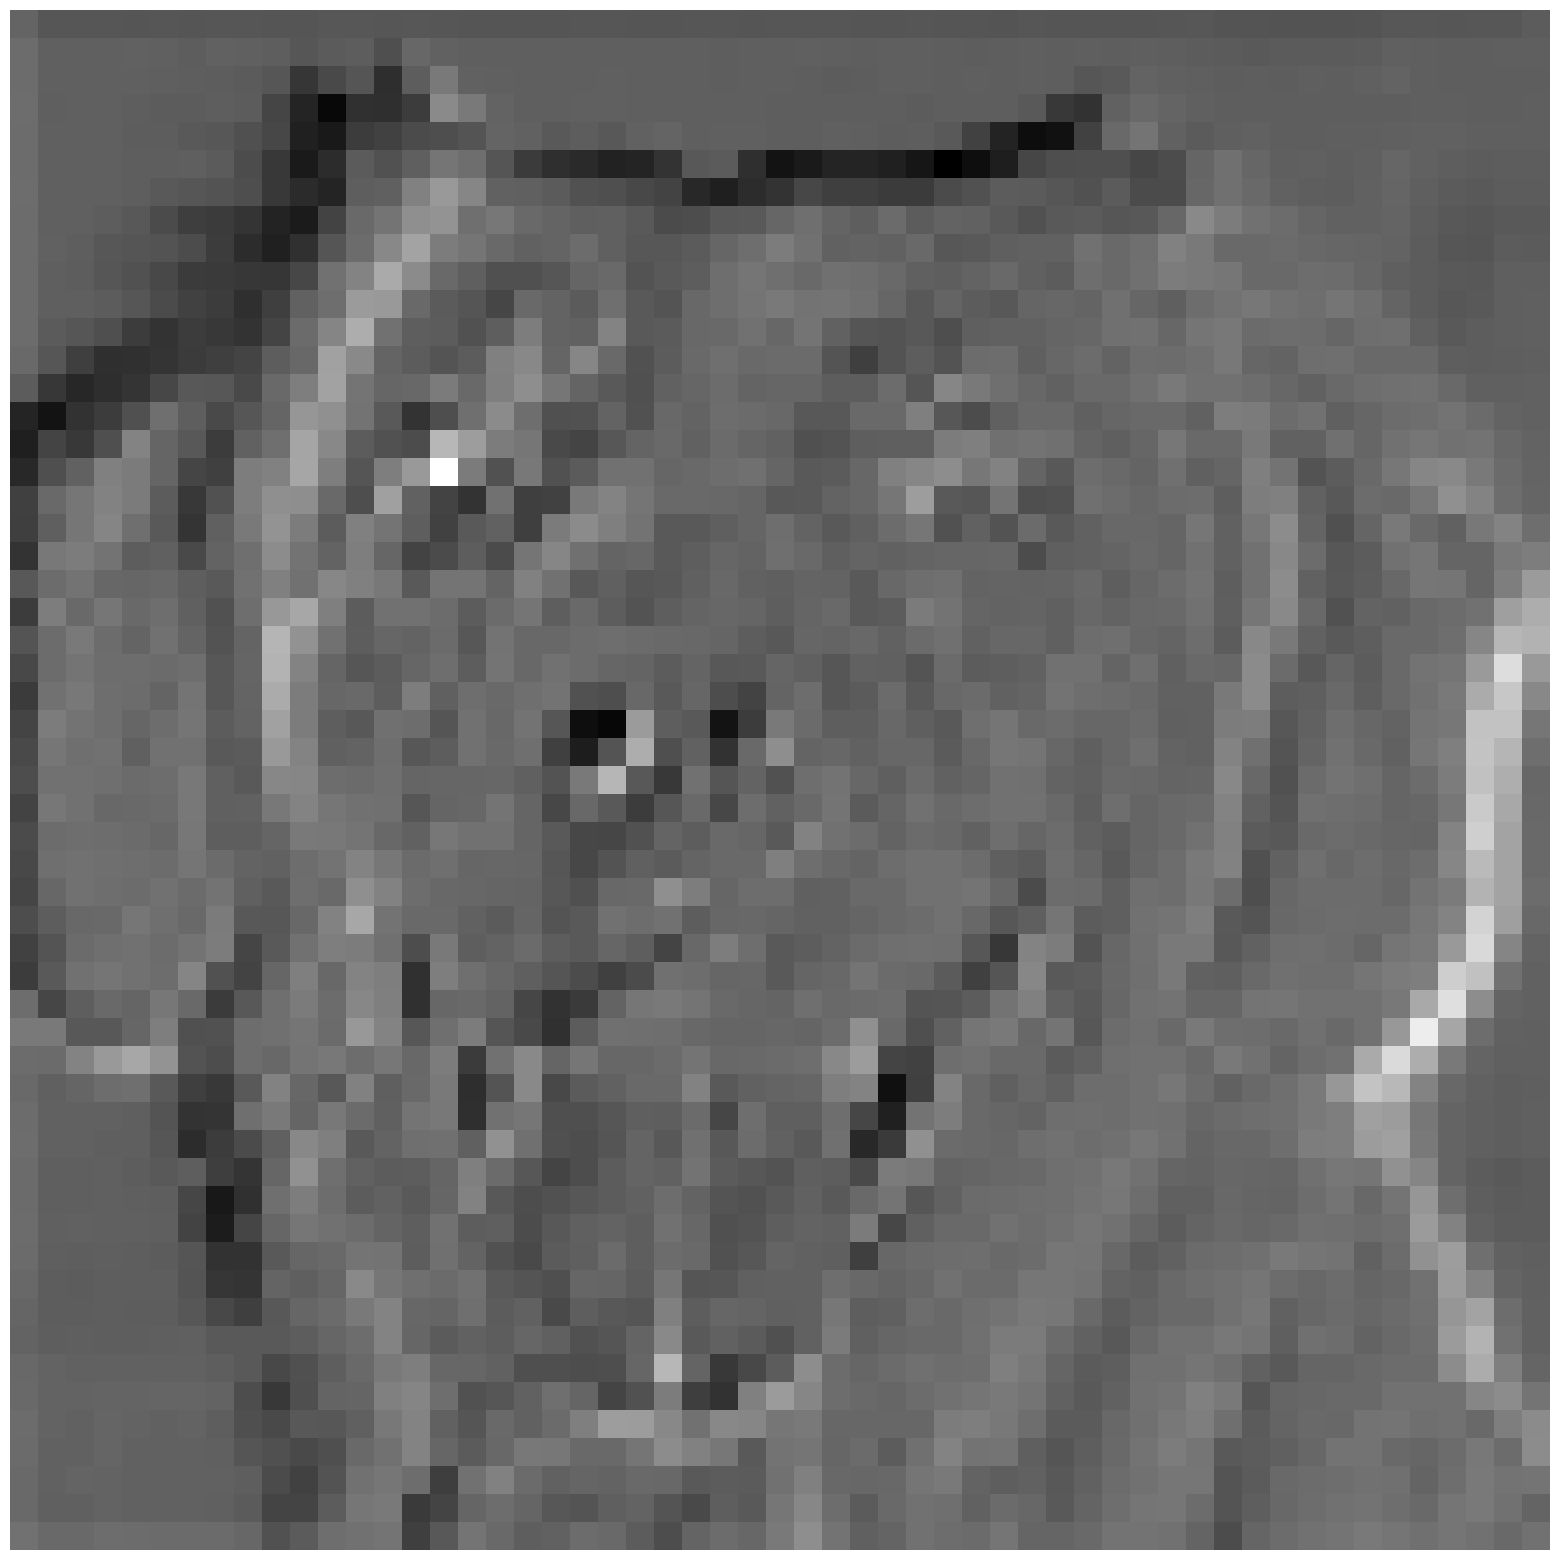

In [ ]:
plot(out[0,0,:,:])
#plots the 2D feature map contained in the NumPy array out, specifically selecting
# the feature map corresponding to the first channel (index 0) of the first sample (index 0) in the batch.

Documentation block:
visualizes how the input image features evolve as they pass through the initial layers of the neural network model

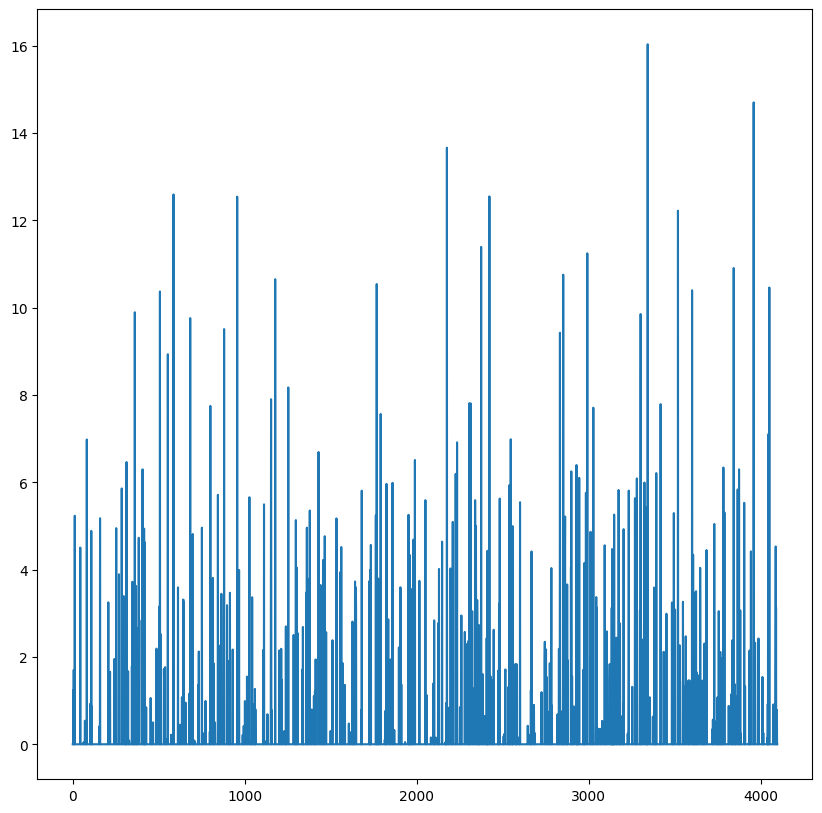

In [ ]:
plt.plot(np.arange(4096),net.classifier[0:6](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy())
#net.features[0:13](img_variable): This passes the input image tensor img_variable through the first 13 layers
#net.avgpool(...): This applies the average pooling operation which educes the spatial dimensions of the feature maps
#net.classifier[0:6](...): This applies the operations of the first six layers of the classifier which produces the final classification scores.
#.flatten(): This flattens the output of the average pooling layer into a 1D tensor
#plt.plot(np.arange(4096), ...): This plots the values of the first six layers of the classifier output against their corresponding indices (ranging from 0 to 4095) on the x-axis.
fig = plt.gcf()
fig.set_size_inches(10, 10)
#These lines adjust the size of the plot figure to make it larger and more readable.

Documentation block:
assigning new image to variable im
then ploting it and giving it the same parameters as previous images

In [ ]:
im = imageio.imread('http://bocasurfcam.com/most_recent_image.php')

<ipython-input-27-db4016f420a5>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('http://bocasurfcam.com/most_recent_image.php')


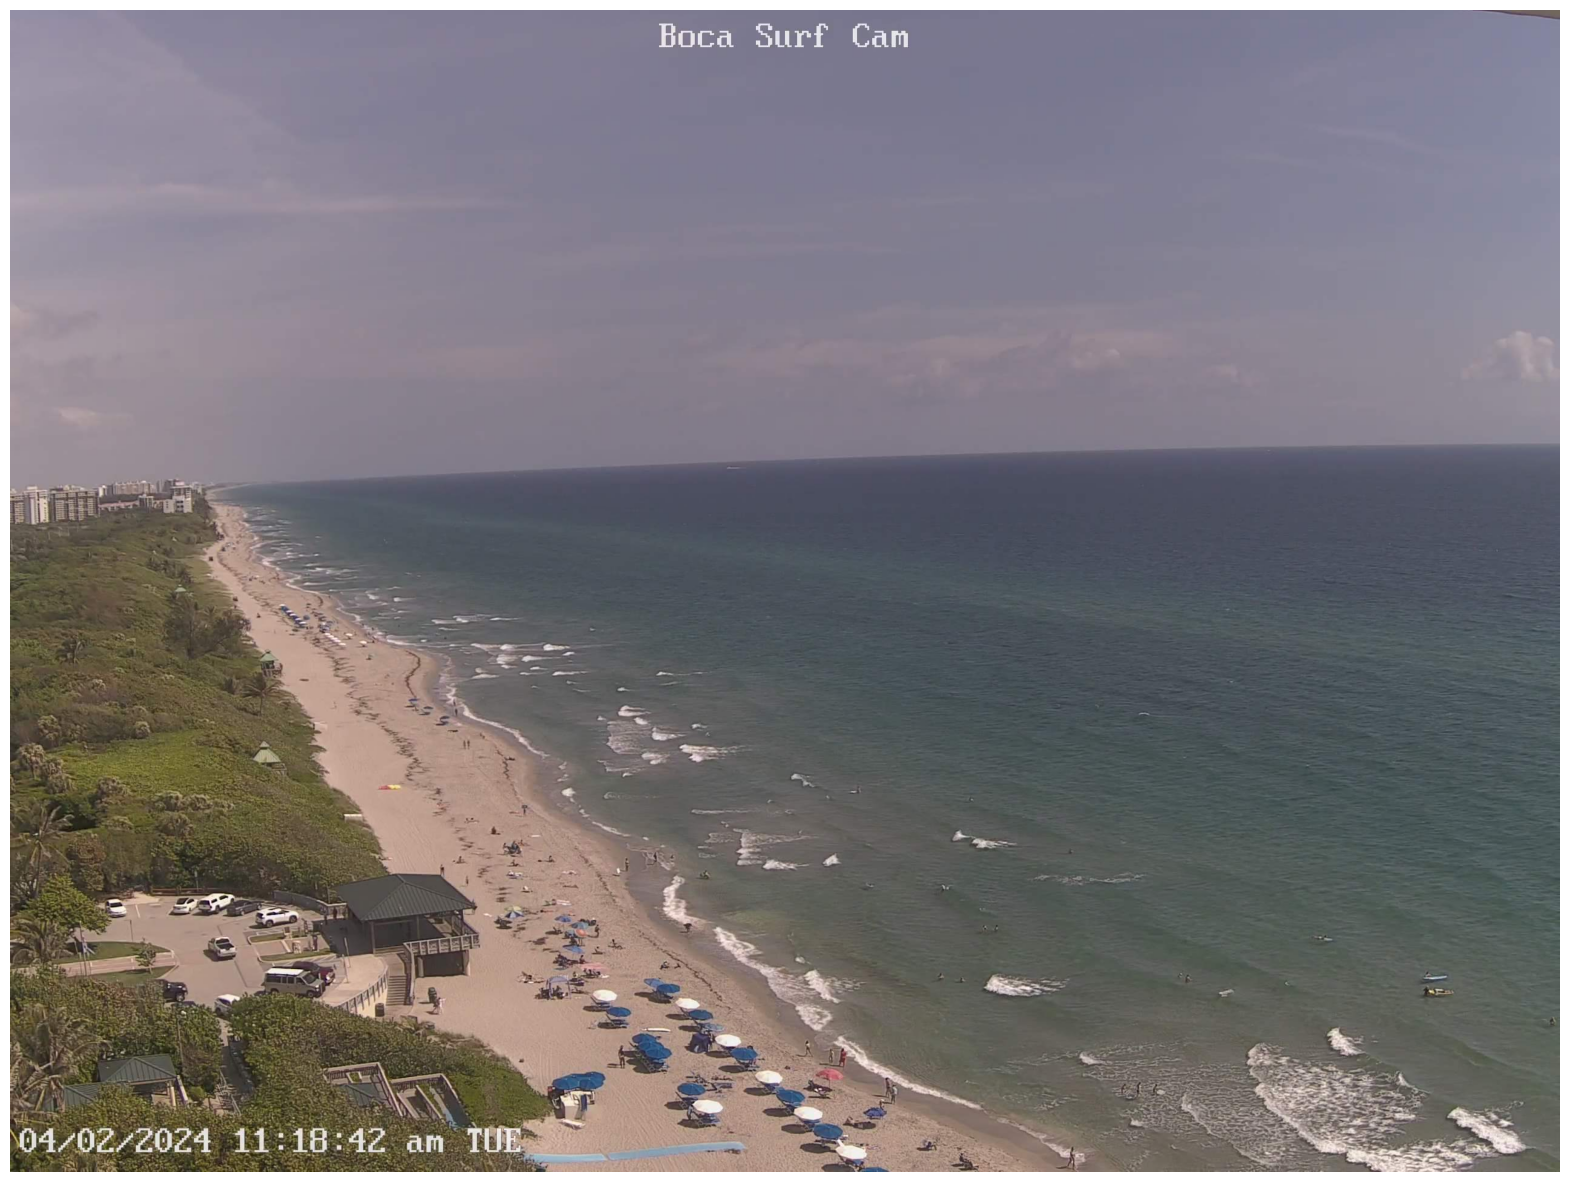

In [ ]:
plot(im) #same as previous code

In [ ]:
def load_im(im):
    image = Image.fromarray(im) #convert to pil
    img_tensor = preprocess(image)
    img_tensor = img_tensor.unsqueeze_(0)
    img_variable = torch.tensor(img_tensor).cuda(0)
    return img_variable

In [ ]:
out = net(load_im(im))

<ipython-input-29-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


In [ ]:
def inference(im):
    out = net(load_im(im))
    label_index = out.cpu().data.numpy().argmax()
    top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:])
    print(labels[label_index])
    print('____')
    for i in range(10):
        print(labels[top_list[i]])

In [ ]:
inference(im) #gives the definition of inference(im) as stated in the code block previous

seashore, coast, seacoast, sea-coast
____
seashore, coast, seacoast, sea-coast
promontory, headland, head, foreland
sandbar, sand bar
breakwater, groin, groyne, mole, bulwark, seawall, jetty
cliff, drop, drop-off
valley, vale
lakeside, lakeshore
alp
volcano
dalmatian, coach dog, carriage dog


<ipython-input-29-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


# Restart Notebook (Disconnect and Delete Runtime) Before Running Next Section

# Custom Data Deck

Documentation block:
All from previous code blocks already explained in Lab 8

In [1]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [20]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

Documentation block:
all defines the plots about to be shown from the url google slides we made ourselves

In [21]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

Documentation block:
describing the formal for our google slides url

In [22]:
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    r.raise_for_status() #raise an exception for http errors
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [23]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

In [24]:
model = alexnet(weights='DEFAULT').to(device)
model.eval();

Documentation block:
inputting our own url that we made into the url=

In [27]:
url = "https://docs.google.com/presentation/d/1xM8KdMoiW01tVOCdAFG_FxwEBRZCjGAbzaSTHYrXu_I/edit#slide=id.g1f80796b803_0_244"

Documentation block:
displaying all the images we chose in our url/ google slides

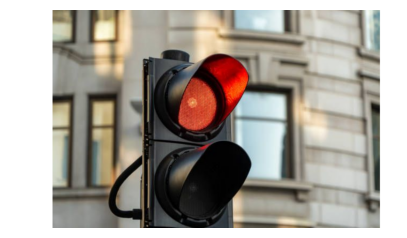

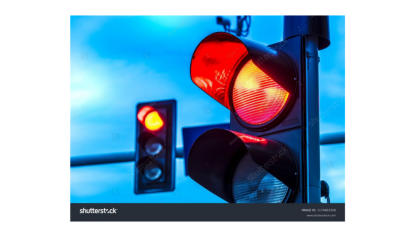

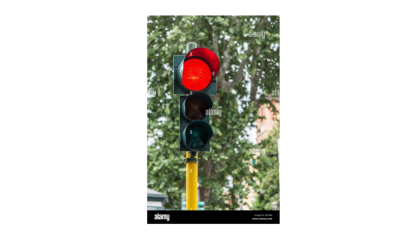

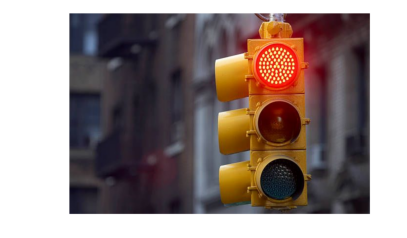

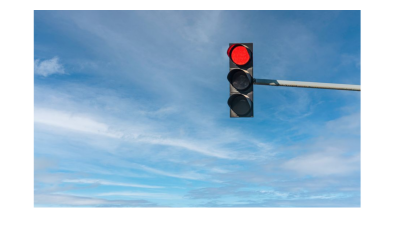

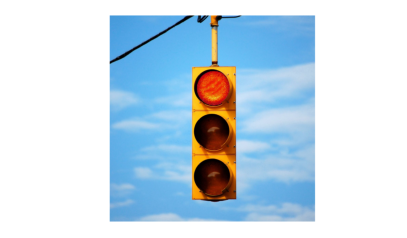

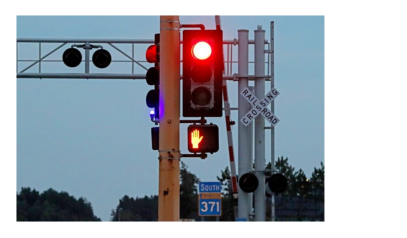

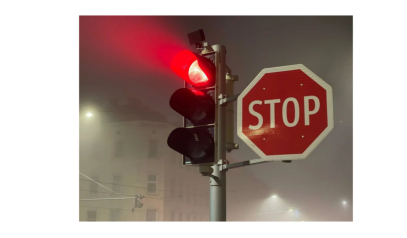

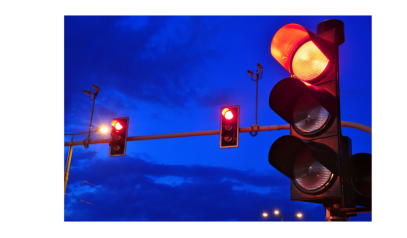

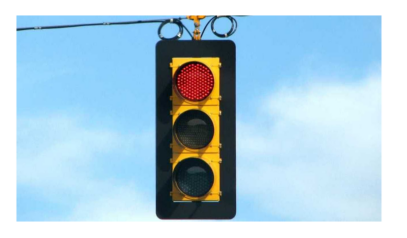

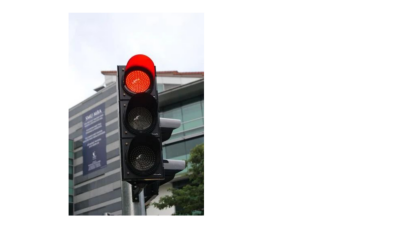

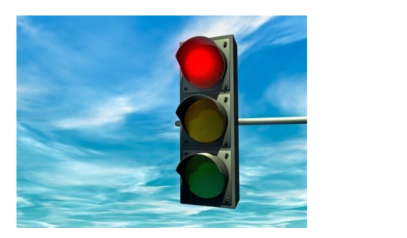

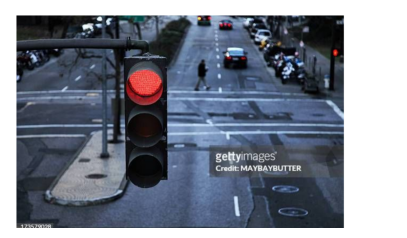

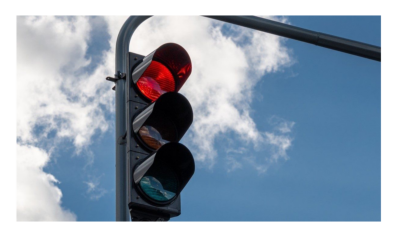

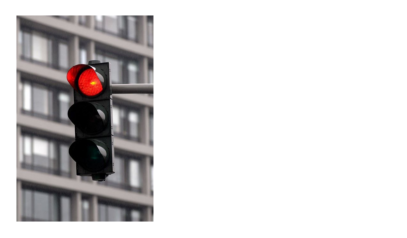

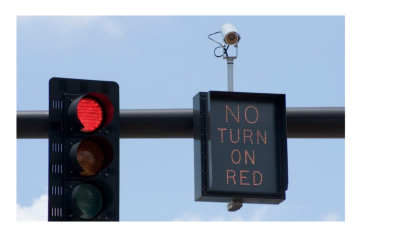

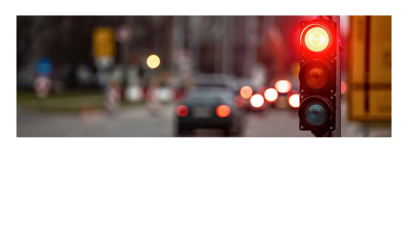

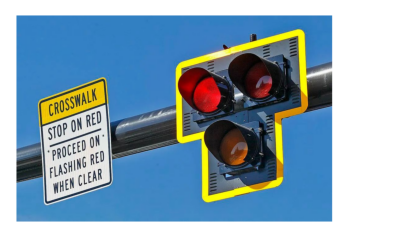

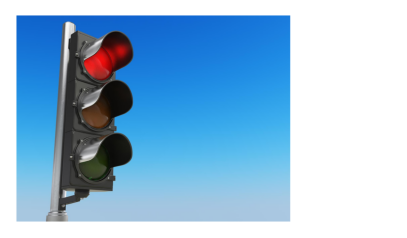

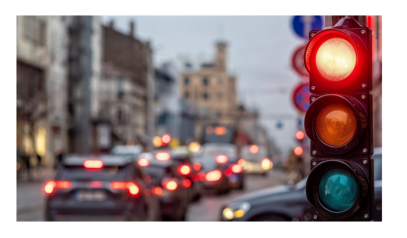

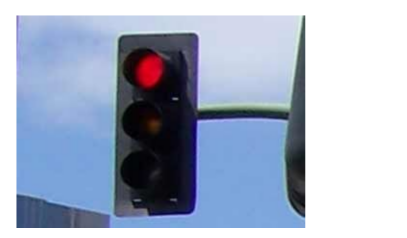

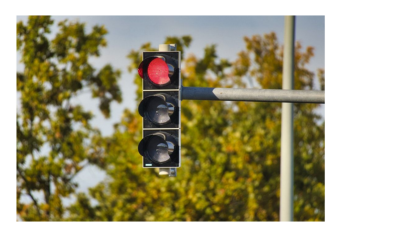

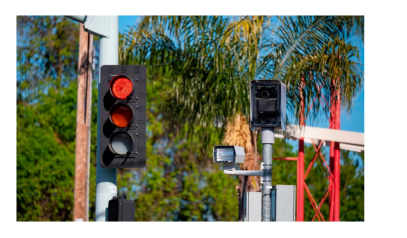

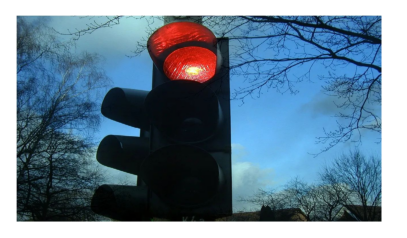

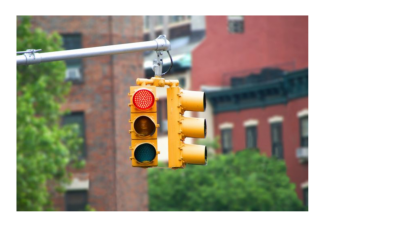

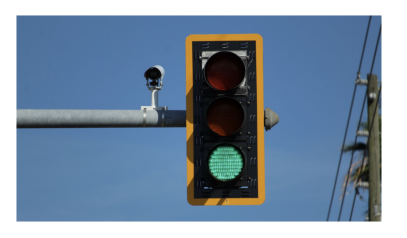

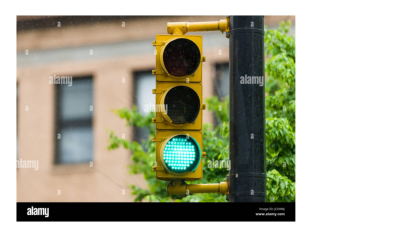

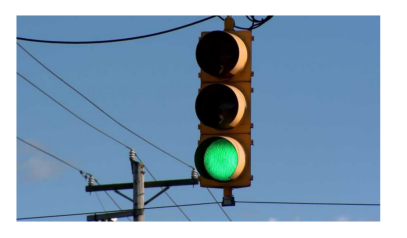

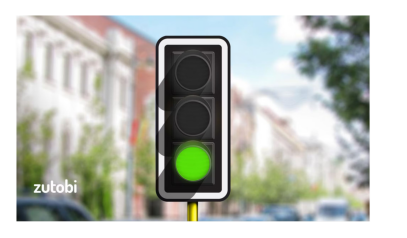

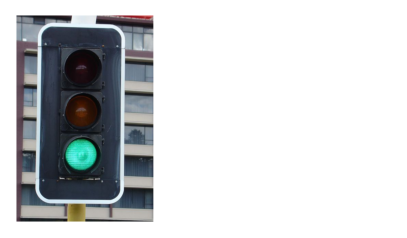

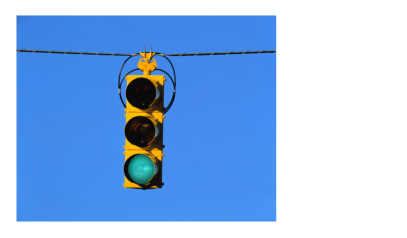

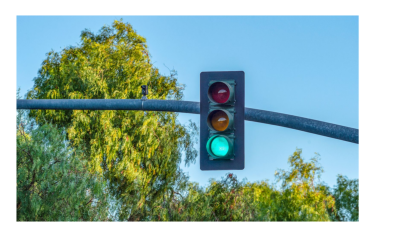

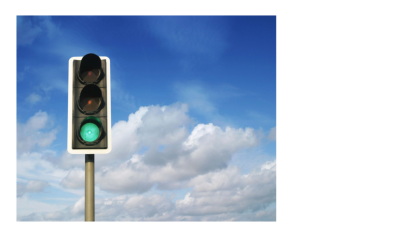

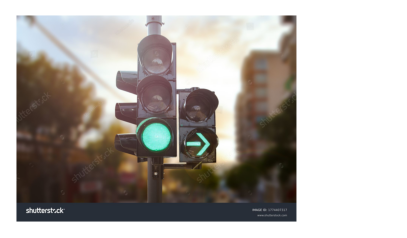

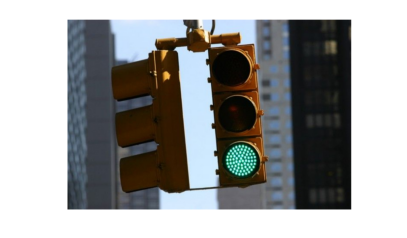

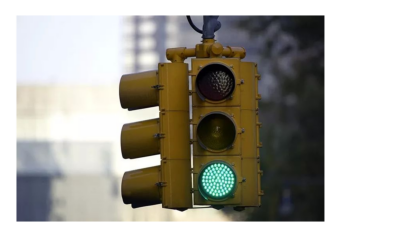

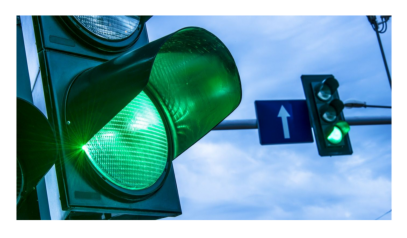

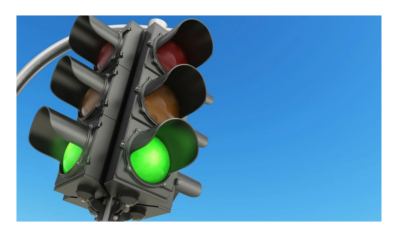

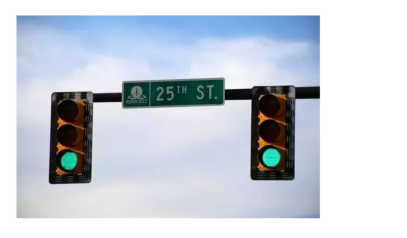

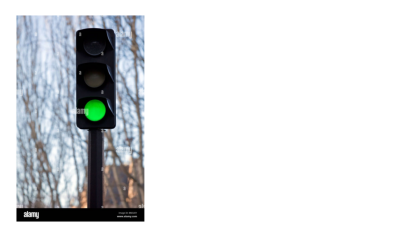

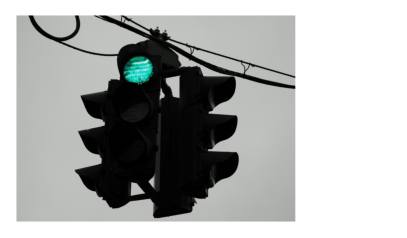

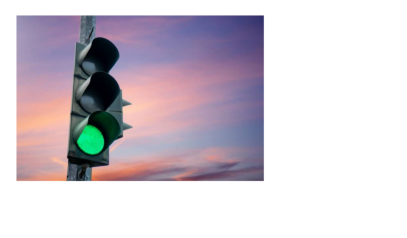

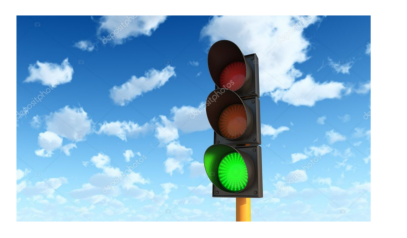

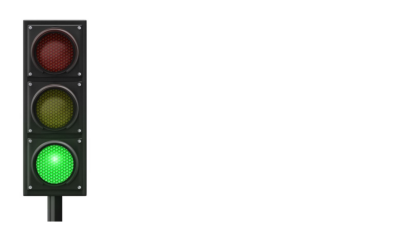

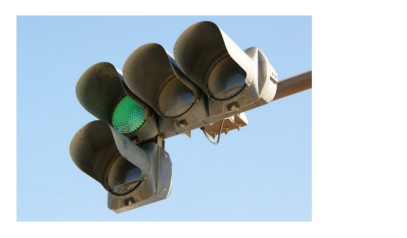

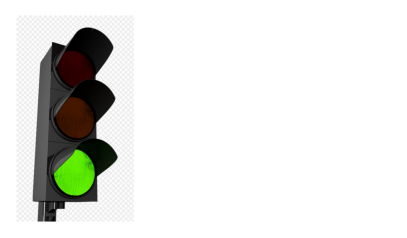

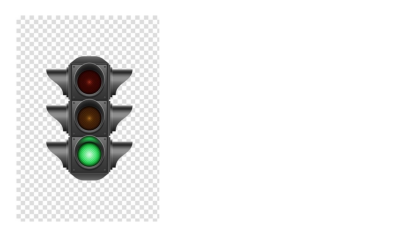

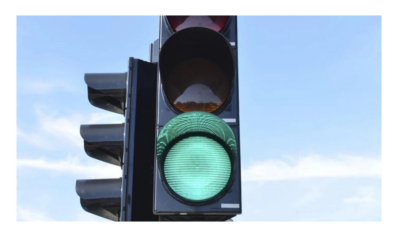

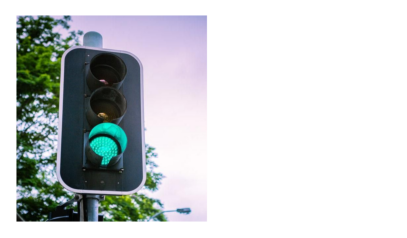

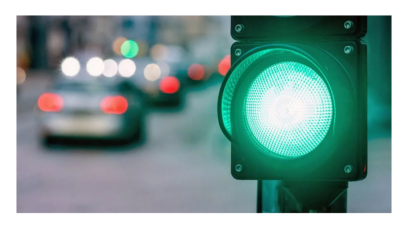

In [28]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [29]:
images.shape

torch.Size([50, 3, 224, 224])

In [30]:
model(images)

tensor([[-5.6728, -5.5477, -6.8623,  ..., -5.1038, -3.0218,  1.0654],
        [-2.4789,  1.0172, -1.4928,  ..., -1.6575,  1.1260,  2.0191],
        [-0.9777, -0.7879, -3.4906,  ..., -5.7857,  1.0851, -0.8738],
        ...,
        [-2.3058, -5.0803, -2.0782,  ..., -4.2898, -1.4165,  2.8027],
        [-1.6658, -2.1233, -1.5317,  ..., -5.8214, -2.0056,  3.0547],
        [-1.6700, -1.3284, -0.9304,  ..., -4.8545, -0.4529,  3.8069]],
       grad_fn=<AddmmBackward0>)

In [31]:
y = model(images)

In [32]:
y.shape

torch.Size([50, 1000])

In [33]:
guesses = torch.argmax(y, 1).cpu().numpy()

Documentation Block:
printing the list of guesses made about what the photos are of

In [34]:
for i in list(guesses):
    print(labels[i])

traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
pill bottle
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
bearskin, busby, shako
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic

In [35]:
Y = np.zeros(50,)
Y[25:] = 1

In [36]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [37]:
X = y.detach().cpu().numpy()

In [38]:
X.shape

(50, 1000)

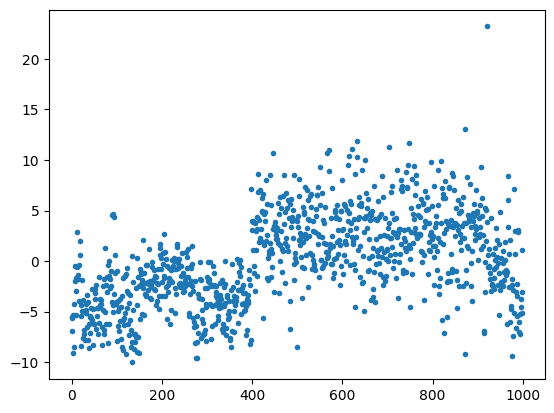

In [39]:
plt.plot(X[0],'.')

In [40]:
X[0]

array([-5.67282820e+00, -5.54765701e+00, -6.86232567e+00, -9.07797813e+00,
       -5.35243845e+00, -4.21432686e+00, -8.47879028e+00, -5.12005150e-01,
       -2.01692510e+00, -5.28051043e+00, -1.64364362e+00, -2.93168807e+00,
        2.88573503e+00, -5.78206837e-01, -1.35963988e+00, -1.80308259e+00,
       -4.24789310e-01, -3.98184109e+00,  1.94883728e+00,  6.16424322e-01,
       -4.33572626e+00, -5.41236210e+00, -8.39625740e+00, -1.91622436e+00,
       -4.98105478e+00, -3.88427114e+00, -7.64052153e+00, -7.20082760e+00,
       -6.77077103e+00, -4.98521328e+00, -7.81460285e+00, -4.25801325e+00,
       -5.13427401e+00, -4.81539345e+00, -6.47483826e+00, -3.34739041e+00,
       -4.04031086e+00, -7.83643246e+00, -8.63701630e+00, -6.23874760e+00,
       -5.41199255e+00, -7.08029556e+00, -5.54295206e+00, -4.68498659e+00,
       -5.60392189e+00, -5.84084320e+00, -2.78691530e+00, -4.69061661e+00,
       -8.32151985e+00, -6.19820070e+00, -6.21466160e+00, -3.77754784e+00,
       -2.79527664e+00, -

In [41]:
np.argmax(X[0])

920

In [42]:
labels[948]

'Granny Smith'

In [43]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [44]:
for i in top_ten:
    print(labels[i])

traffic light, traffic signal, stoplight
tripod
loudspeaker, speaker, speaker unit, loudspeaker system, speaker system
punching bag, punch bag, punching ball, punchball
parking meter
lens cap, lens cover
gasmask, respirator, gas helmet
binoculars, field glasses, opera glasses
frying pan, frypan, skillet
knee pad


In [45]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 71., 169., 273., 240., 175.,  59.,  12.,   0.,   0.,   1.]),
 array([-10.02173042,  -6.70062637,  -3.37952185,  -0.0584177 ,
          3.26268649,   6.58379078,   9.90489483,  13.22599888,
         16.54710388,  19.86820793,  23.18931198]),
 <BarContainer object of 10 artists>)

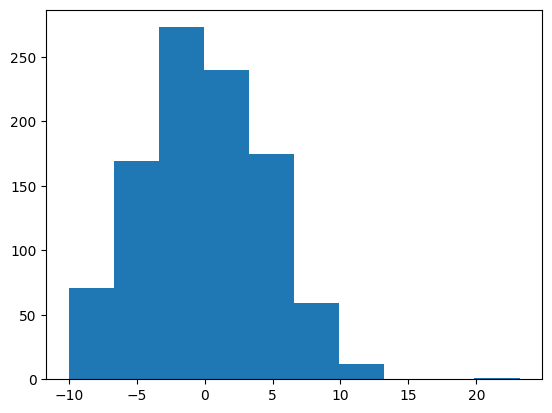

In [46]:
plt.hist(X[0]) #histogram plot of X

In [48]:
X = GPU_data(X) #moves data to the GPU
Y = GPU_data(Y)

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
def softmax(x): #computes the softmax activation function for a given input tensor x
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

torch.Size([50, 1000])

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():

    acc_train = acc(model(x,w),y)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 4
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    wb.log({"loss": loss})

    make_plots()


Thank you for an awesome semester professor!
Hope all is well with you and your family!